In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import fitz
from picconfig import temppath, outputpath

def pdf_to_np(file_path):
    image_arrays = []
    pdf_document = fitz.open(file_path)

    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        zoom_matrix = fitz.Matrix(3.0, 3.0)
        pix = page.get_pixmap(matrix=zoom_matrix)
        channels = pix.n
        image_array = np.frombuffer(pix.samples, dtype=np.uint8).reshape((pix.height, pix.width, channels))
        image_arrays.append(image_array)

    return image_arrays

In [2]:
img1 = plt.imread(f"{temppath}Network3.png")
img2 = plt.imread(f"{temppath}Network4.png")
img3 = plt.imread(f"{temppath}Network5.png")
img4 = plt.imread(f"{temppath}Network6.png")

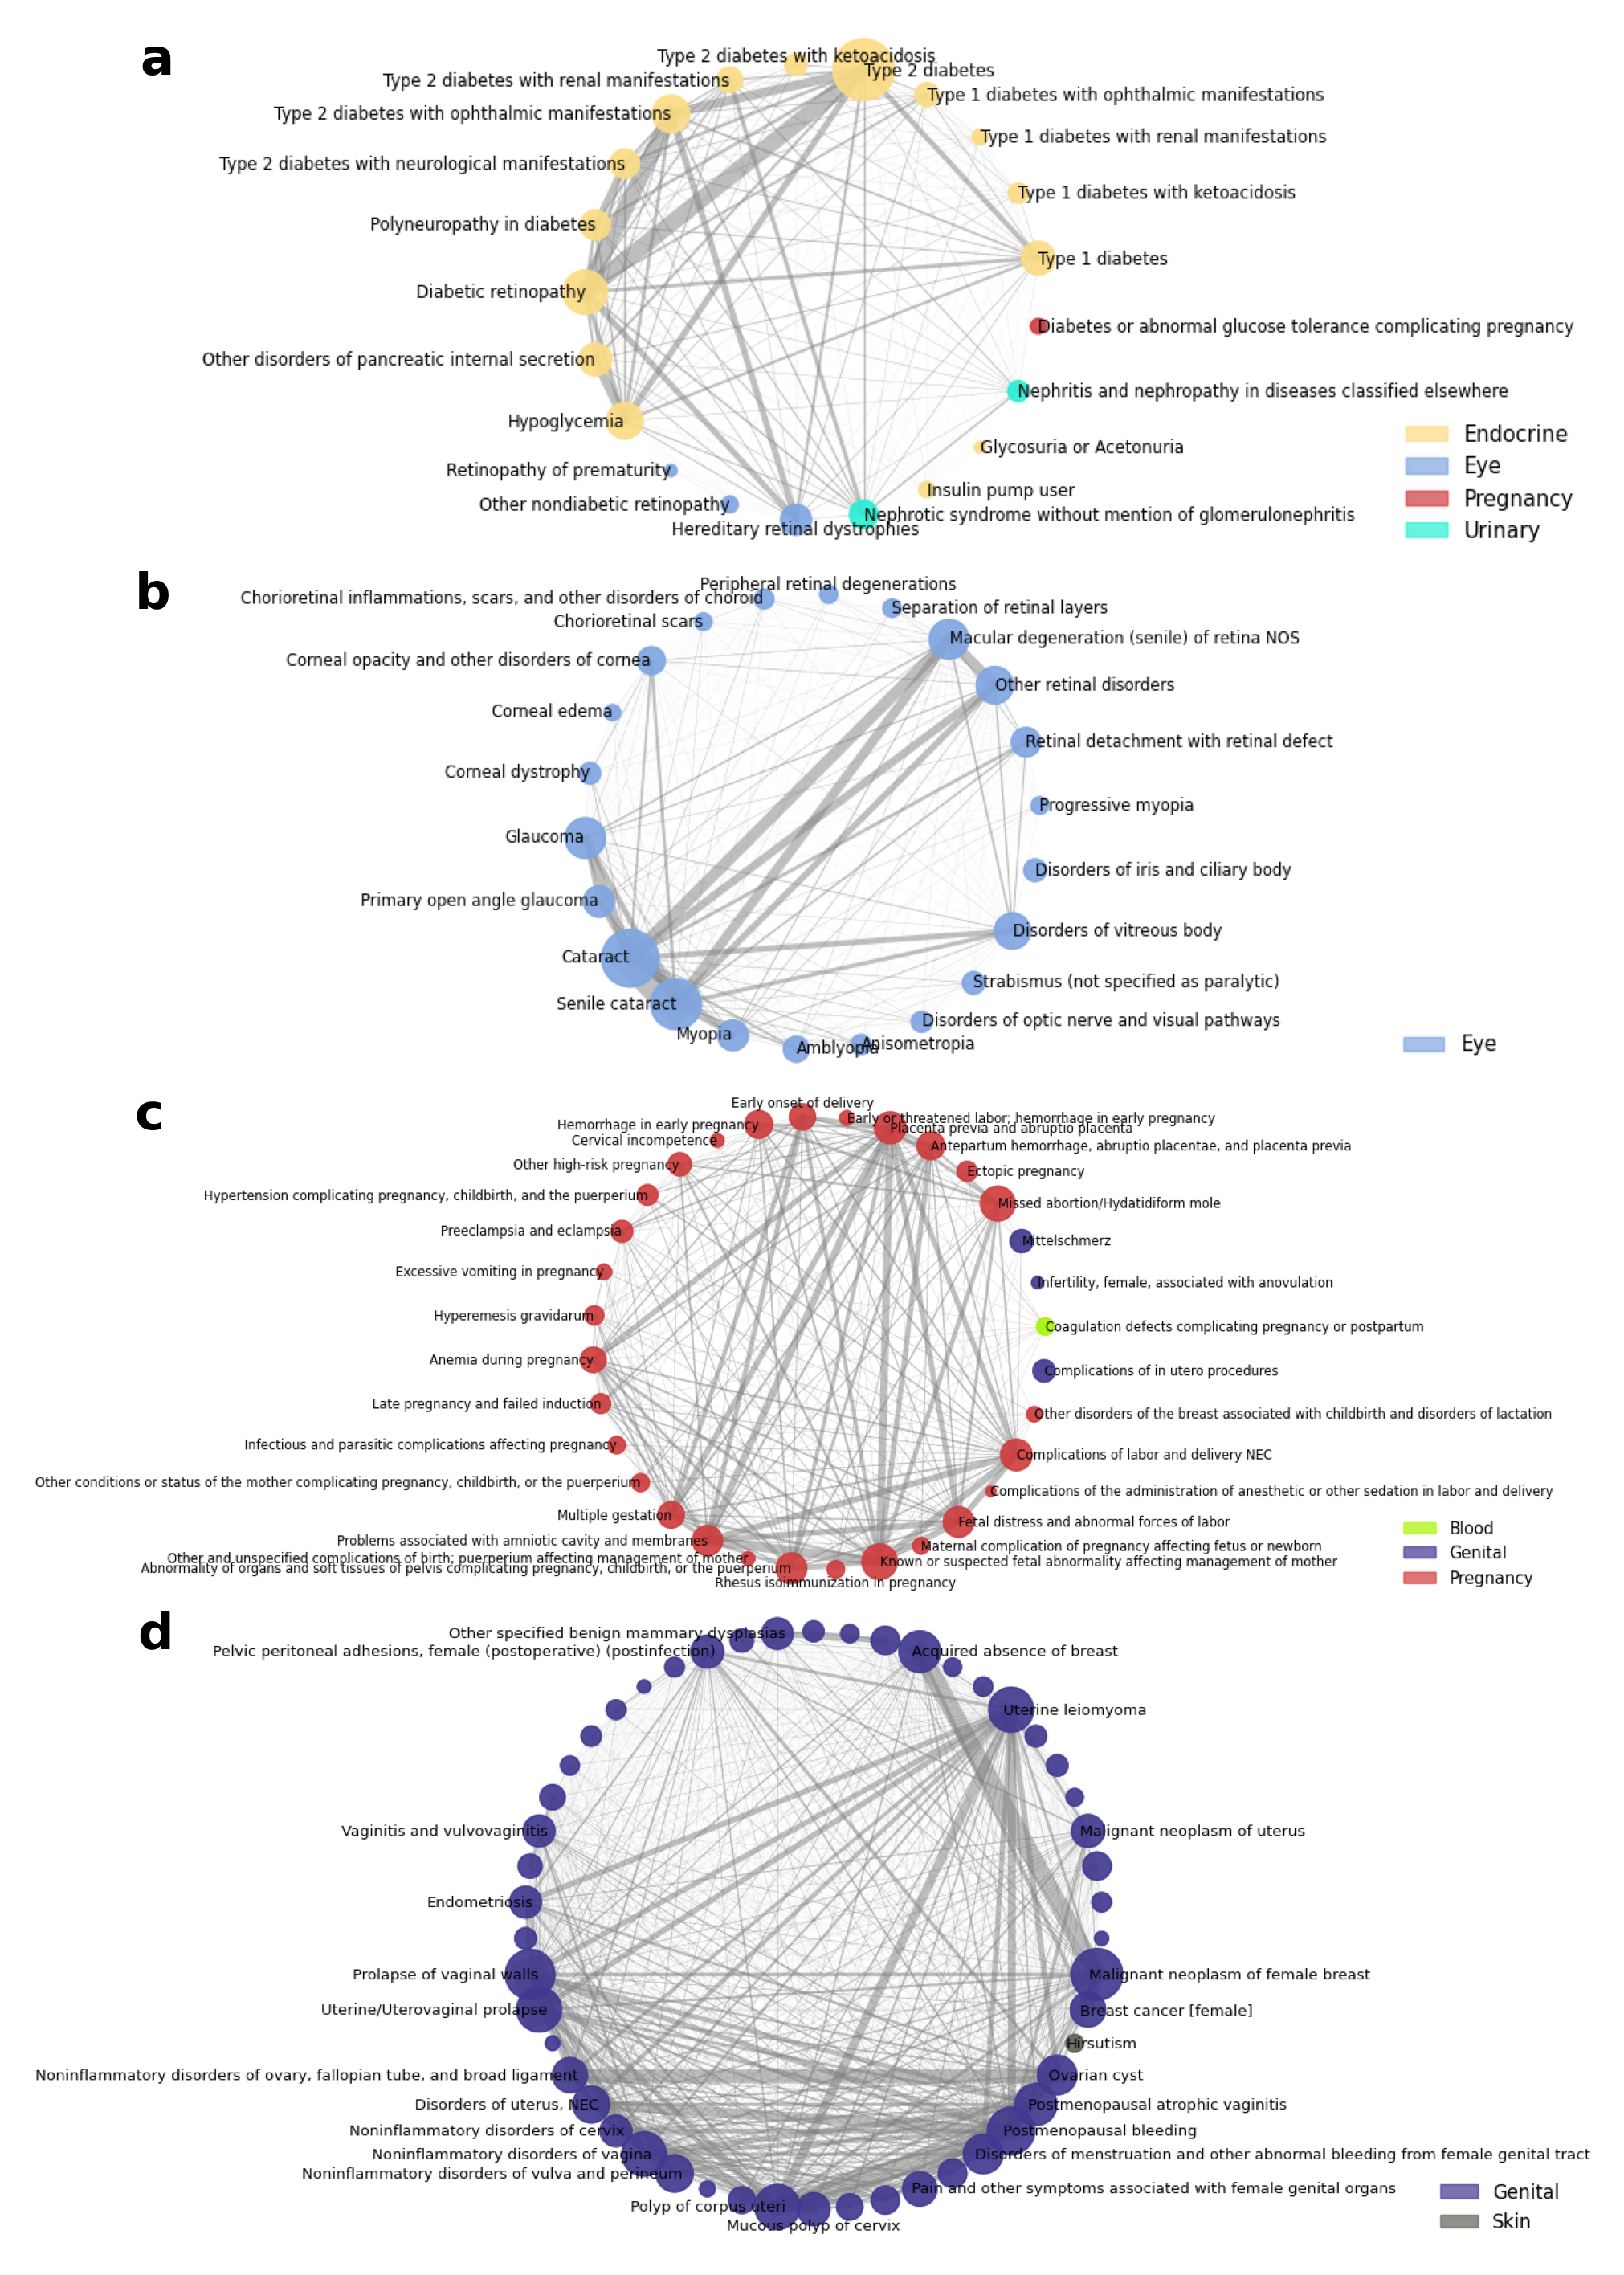

In [3]:
fig = plt.figure(figsize=(10,12),dpi=300)
gs0 = gridspec.GridSpec(4, 1, figure=fig, hspace=-0.02, height_ratios=[1,(img2.shape[0] * img1.shape[1]) / (img2.shape[1] * img1.shape[0]),
                        (img3.shape[0] * img1.shape[1]) / (img3.shape[1] * img1.shape[0]),(img4.shape[0] * img1.shape[1]) / (img4.shape[1] * img1.shape[0])])
ax1 = fig.add_subplot(gs0[0, 0])
ax1.imshow(img1)
ax1.text(80,35,"a",fontsize=15, fontweight=600)
ax1.axis("off")
ax2 = fig.add_subplot(gs0[1, 0])
ax2.imshow(img2)
ax2.text(80,40,"b",fontsize=15, fontweight=600)
ax2.axis("off")
ax3 = fig.add_subplot(gs0[2, 0])
ax3.imshow(img3)
ax3.text(100,45,"c",fontsize=15, fontweight=600)
ax3.axis("off")
ax4 = fig.add_subplot(gs0[3, 0])
ax4.imshow(img4)
ax4.text(100,45,"d",fontsize=15, fontweight=600)
ax4.axis("off")
plt.savefig(f"{outputpath}sup_network.pdf",format="pdf",bbox_inches="tight")
plt.show()